# import

In [82]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sidetable as stb
import keyboard
import winsound

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, PowerTransformer
# .fit(), .transformer(), fit_transformer()
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 
from sklearn import metrics # .mean_squared_error(), .r2_score()
from sklearn.linear_model import Ridge
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

cm = 1/2.54

In [161]:
def beep():
    # define the frequency and duration of the beep

    duration = 500  # in milliseconds

    # loop until a key is pressed
    while True:
        winsound.Beep(600, duration)

        if keyboard.is_pressed('esc'):  # check if the 'esc' key is pressed
            break

# Importacao

In [31]:
db = pd.read_csv('..\data\centroid_PINiCo2.csv', index_col=0)

In [32]:
db_chem = db.loc[:, ['Mineral Classification', 'Spectrum Counts', 'Ti', 'Fe', 'Al', 'Si', 'Ni', 'Mn', 'Co', 'Mg', 'Cr', 'Ca', 'Ba', 'Na', 'K', 'Zn']]

# Pipeline

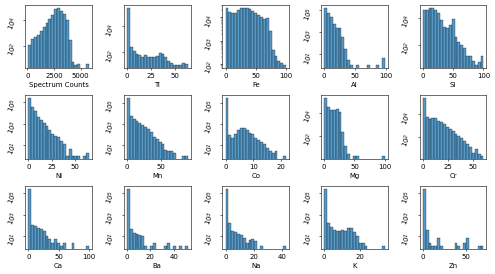

In [33]:
# ANALISANDO DISTRIBUICAO DOS ELEMENTOS

plt.figure(figsize=(10,7), dpi = 50)
x = 1
for i in db_chem.loc[:,'Spectrum Counts':].columns:
    plt.subplot(4,5, x)
    x += 1
    sns.histplot(data = db_chem, x = i, bins = 21)
    plt.yscale('log')
    plt.ylabel('')
    plt.yticks(rotation = 70)

plt.tight_layout();

In [34]:
PT = PowerTransformer(method='yeo-johnson', standardize = True).fit_transform(db_chem.loc[:,'Spectrum Counts':])

X = db_chem.loc[:,'Mineral Classification']

X = pd.concat(
    [X, pd.DataFrame(data = PT, columns=db_chem.loc[:,'Spectrum Counts':].columns)],
    axis = 1)


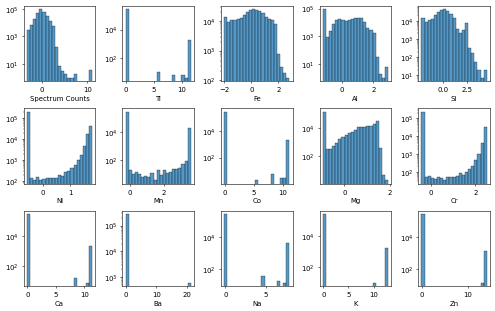

In [35]:
plt.figure(figsize=(10,8), dpi = 50)
x = 1
for i in X.loc[:, 'Spectrum Counts':].columns:
    plt.subplot(4,5, x)
    x += 1
    sns.histplot(data = X, x = i, bins = 21)
    plt.yscale('log')
    plt.ylabel('')
    
plt.tight_layout();

# PCA

In [22]:
n_components = 11

pca_model = PCA(n_components)
pca = pd.DataFrame(data = pca_model.fit_transform(X.loc[:, 'Spectrum Counts':]),
                columns = np.arange(1, (n_components+1), 1))

pca_model.explained_variance_ratio_

array([0.1270299 , 0.10039935, 0.09743577, 0.07663037, 0.07162051,
       0.06743725, 0.06670735, 0.06652287, 0.06585714, 0.06455071,
       0.06120798])

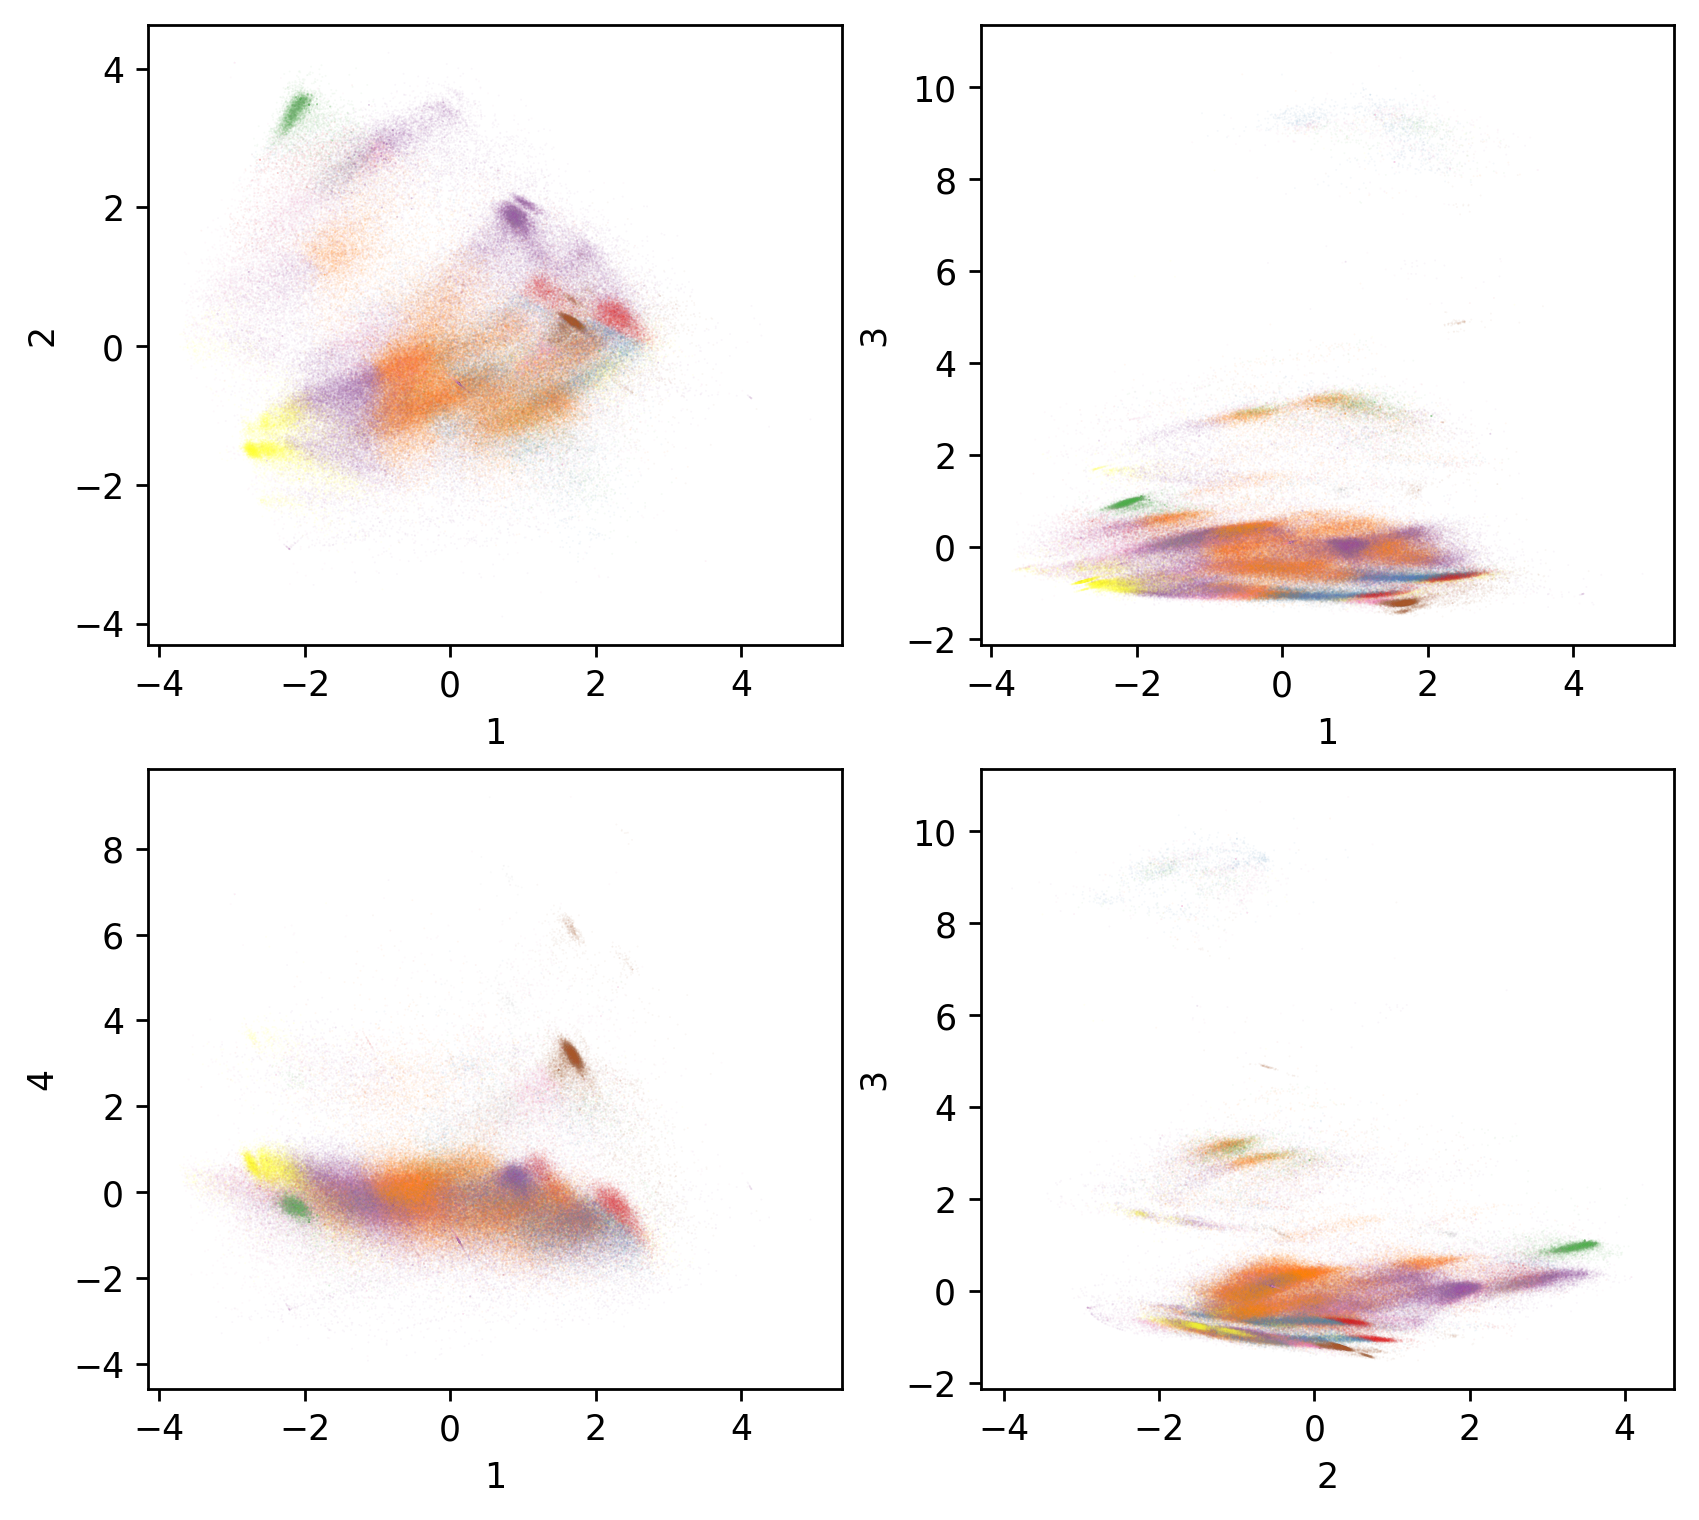

In [23]:
# PC vs PC

plt.figure(figsize = (20*cm, 18*cm), dpi = 250)

# Config
alpha = 0.05
size = 0.3
minerals = X['Mineral Classification']
palet = 'Set1'
legenda = False

plt.subplot(2,2,1)

sns.scatterplot(
    data = pca,
    x = 1,
    y = 2,
    s = size,
    alpha = alpha,
    # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda
)

plt.subplot(2,2,2)

sns.scatterplot(
    data = pca,
    x = 1,
    y = 3,
    s = size,
    alpha = alpha,
      # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda 
)

plt.subplot(2,2,3)

sns.scatterplot(
    data = pca,
    x = 1,
    y = 4,
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.subplot(2,2,4)

sns.scatterplot(
    data = pca,
    x = 2,
    y = 3,
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.show()

# Split Data

In [169]:
y = X['Mineral Classification']

XTrain, XTest, yTrain, yTest = train_test_split(X.drop('Mineral Classification', axis = 1), 
                                                y, 
                                                train_size = 0.1, 
                                                stratify = y)


display(XTrain.shape, XTest.shape, )
# XTrain.head(), XTest.head(), yTrain.head(), yTest.head())


(27004, 15)

(243039, 15)

# K-means

In [94]:
# create kmeans object
kmeans = KMeans(n_clusters=38)

kmeans.fit(XTrain)

# print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(XTrain)

yTrain['km'] = y_km

In [95]:
inertia = []
for i in range(10, 25, 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(XTrain)
    inertia.append(kmeans.inertia_)

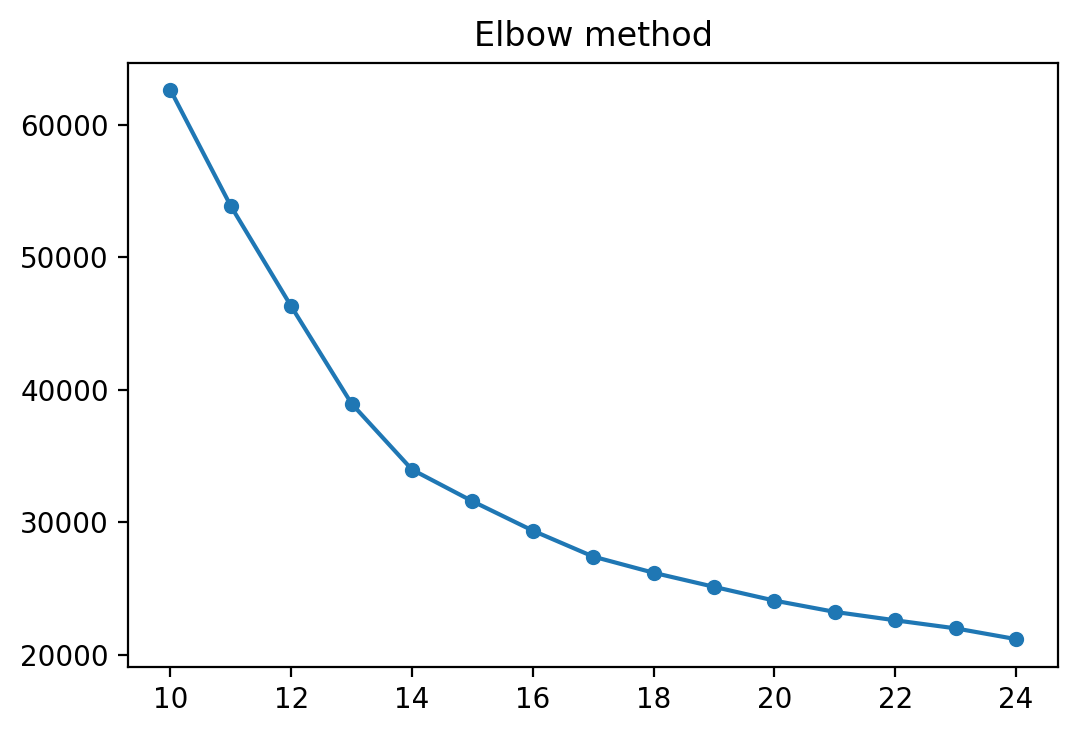

In [96]:
plt.figure(dpi=200)
sns.lineplot(x = range(10, 25, 1), y = inertia)
sns.scatterplot(x = range(10, 25, 1), y = inertia)
plt.title("Elbow method");

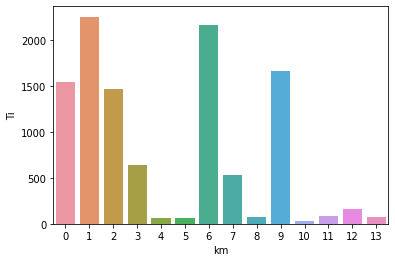

In [92]:
sns.barplot(data = pd.concat([first_layer, XTrain], axis = 1).groupby('km', as_index = False).count()[['km', 'Ti']],
            x = 'km',
            y = 'Ti'
)

cluster4 = pd.concat([first_layer, XTrain], axis = 1)
cluster4 = cluster4[cluster4['km'] == 6]

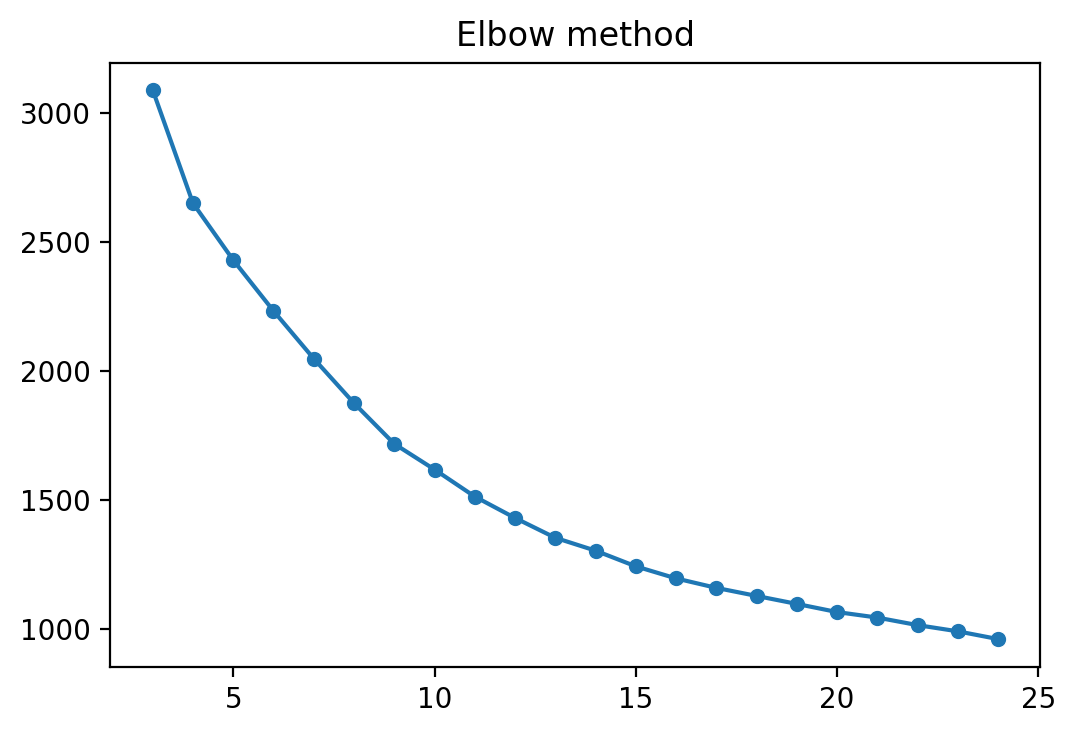

In [93]:
inertia = []
for i in range(3, 25, 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(cluster4.loc[:, 'Spectrum Counts':])
    inertia.append(kmeans.inertia_)

plt.figure(dpi=200)
sns.lineplot(x = range(3, 25, 1), y = inertia)
sns.scatterplot(x = range(3, 25, 1), y = inertia)
plt.title("Elbow method");

# Agglomerative Clustering

In [38]:
hc = AgglomerativeClustering(n_clusters=23, affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
y_hc = hc.fit_predict(XTrain.loc[:,:])

yTrain['hc'] = y_hc

In [42]:
pca_train = pd.DataFrame(data = PCA(4).fit_transform(XTrain.loc[:, 'Spectrum Counts':'Zn']),
                columns = ['PC1', 'PC2','PC3', 'PC4'])

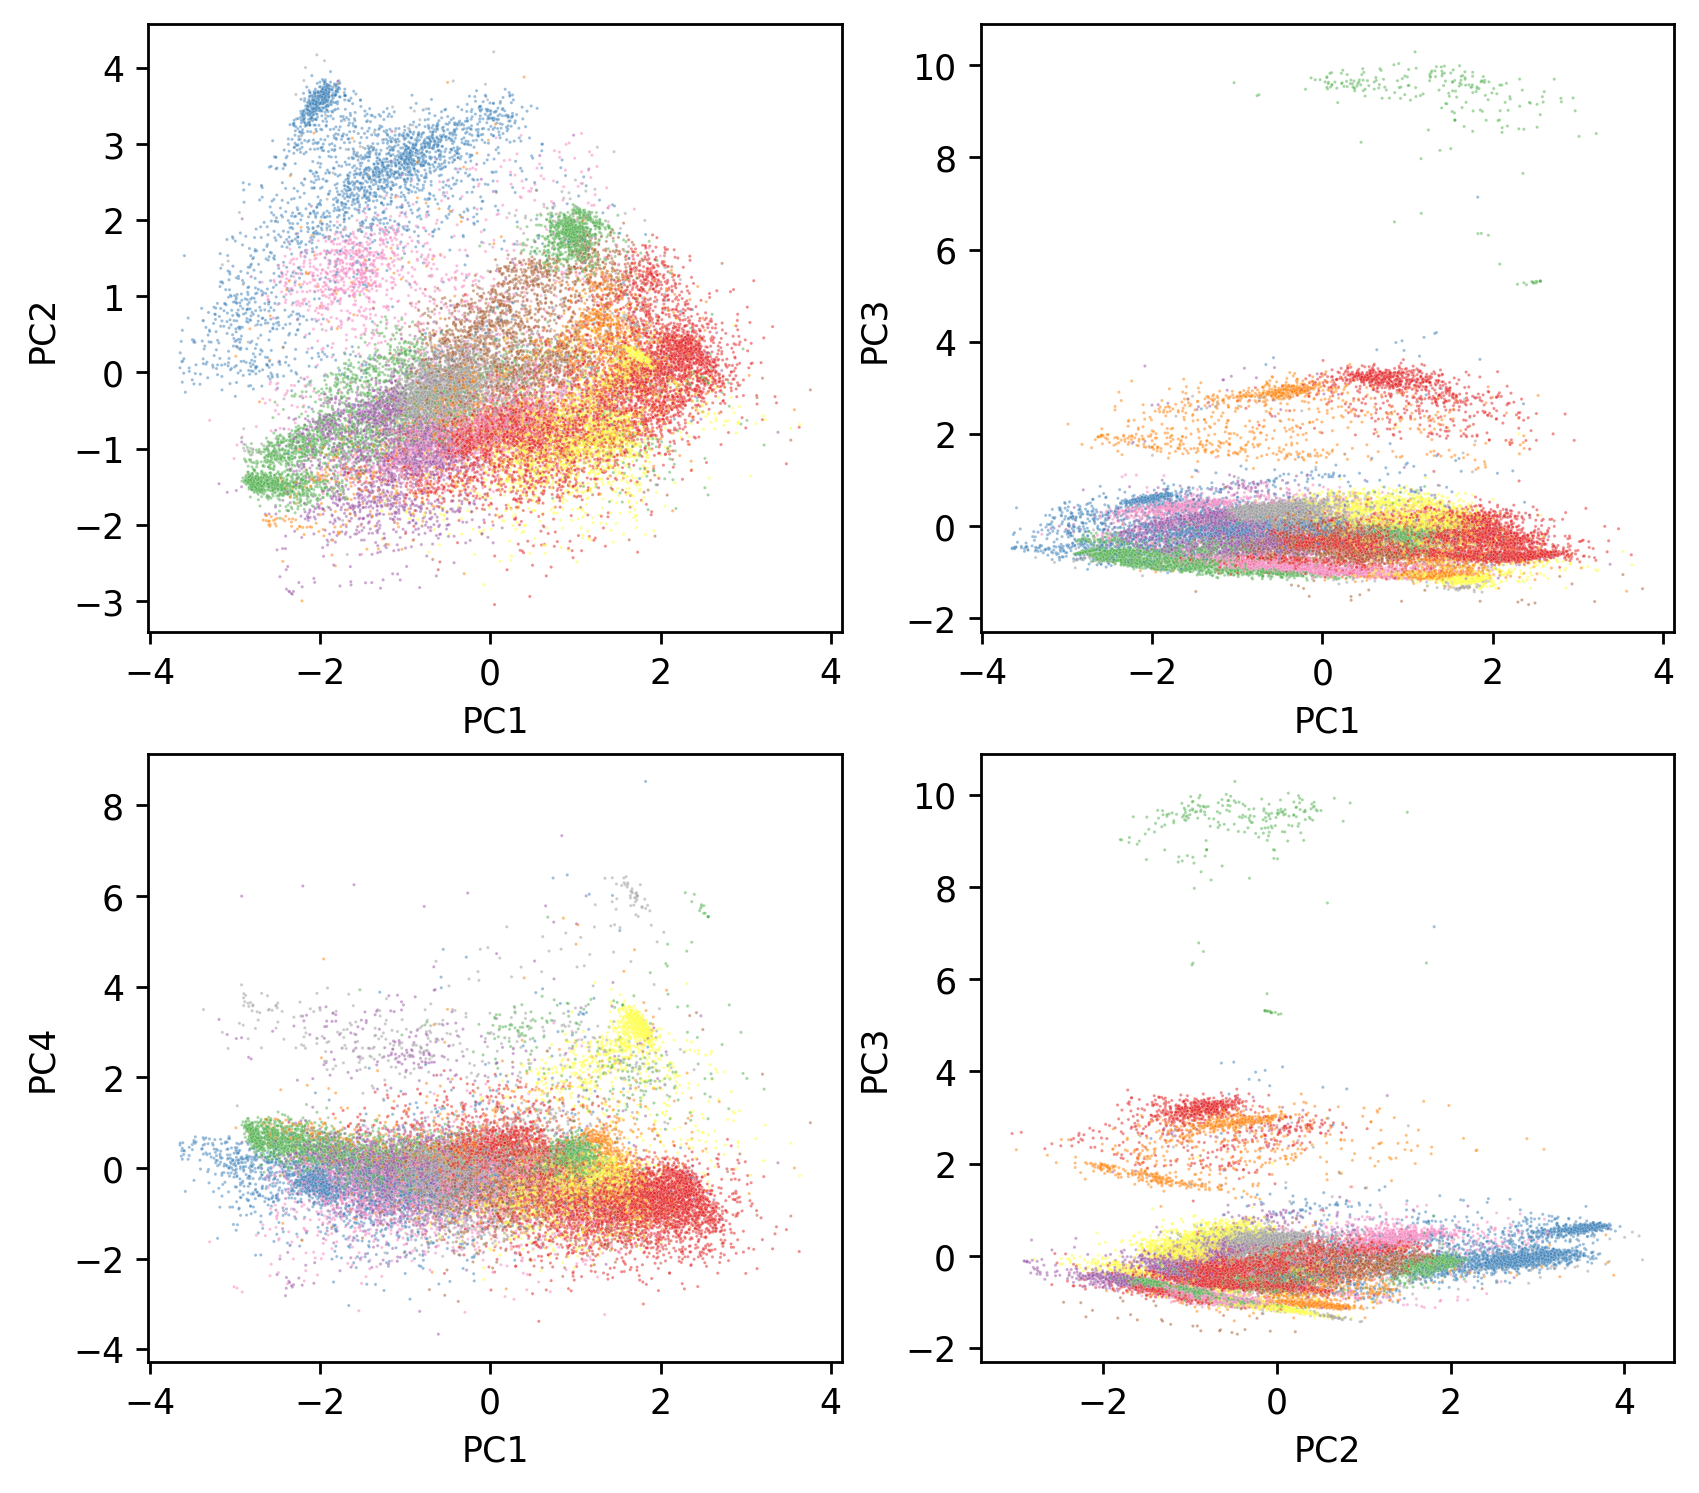

In [45]:
# PC vs PC

plt.figure(figsize = (20*cm, 18*cm), dpi = 250)

# Config
alpha = 0.5
size = 0.8
minerals = yTrain['hc']
palet = 'Set1'
legenda = False

plt.subplot(2,2,1)

sns.scatterplot(
    data = pca_train,
    x = 'PC1',
    y = 'PC2',
    s = size,
    alpha = alpha,
    # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda
)

plt.subplot(2,2,2)

sns.scatterplot(
    data = pca_train,
    x = 'PC1',
    y = 'PC3',
    s = size,
    alpha = alpha,
      # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda 
)

plt.subplot(2,2,3)

sns.scatterplot(
    data = pca_train,
    x = 'PC1',
    y = 'PC4',
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.subplot(2,2,4)

sns.scatterplot(
    data = pca_train,
    x = 'PC2',
    y = 'PC3',
    s = size,
    alpha = alpha,
        # color = 'black',
    hue = minerals,
    palette = palet,
    legend=legenda  
)

plt.show()

In [73]:
db_melt = XTrain.melt(id_vars= ['hc'])
db_melt.head()

,hc,variable,value
0,14,Spectrum Counts,-1.397145
1,14,Spectrum Counts,-1.529059
2,18,Spectrum Counts,0.608323
3,9,Spectrum Counts,1.621064
4,7,Spectrum Counts,-1.860241


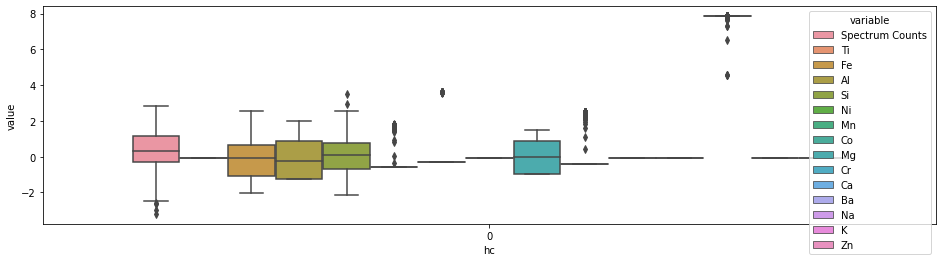

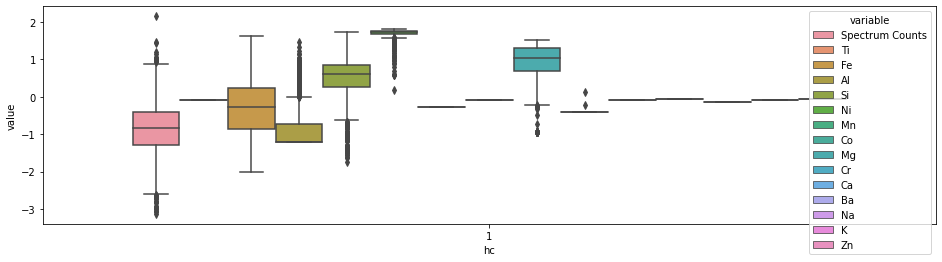

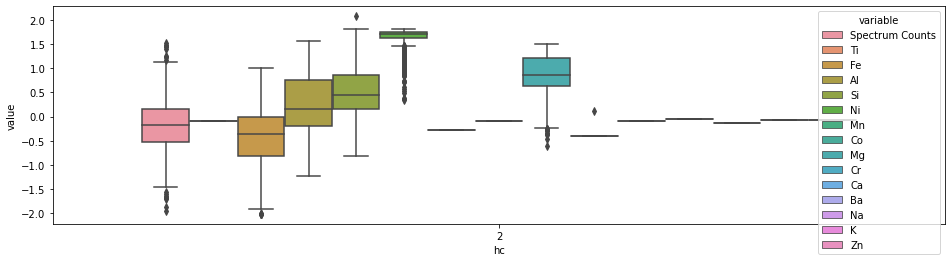

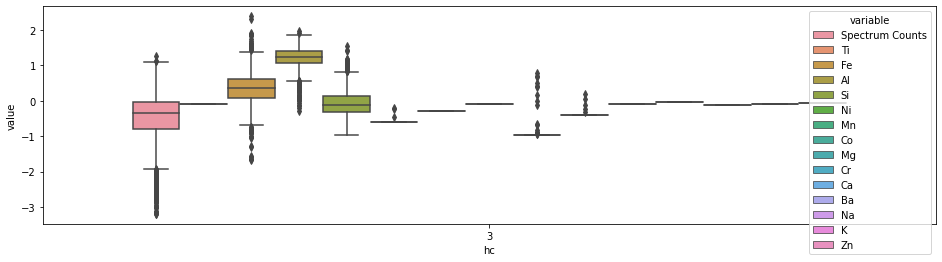

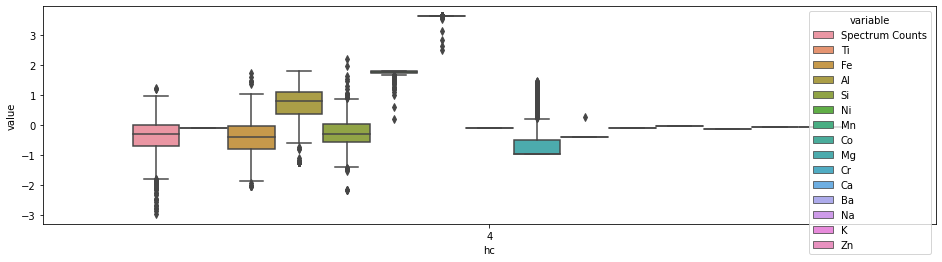

In [74]:
for i in range(5):
    filter = (db_melt['hc'] == i)
    plt.figure(figsize=(16,4))
    sns.boxplot(data = db_melt[filter], x = 'hc', y = 'value', hue = 'variable');

# Silhouette

## K-Means

In [ ]:
sil_score_max = -1 #this is the minimum possible score

silhouette = pd.DataFrame(columns = ['n_clusters', 'sil_score'])

range = range(20,40,1)

for n_clusters in range:
  model = KMeans(n_clusters = n_clusters, init='k-means++', n_init=1)
  labels = model.fit_predict(XTrain)
  sil_score = silhouette_score(XTrain, labels)
  # print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))

  silhouette = pd.concat([silhouette, pd.DataFrame(data=[[n_clusters, sil_score]], columns=['n_clusters', 'sil_score'])])
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

silhouette.reset_index(inplace=True, drop=True)


27


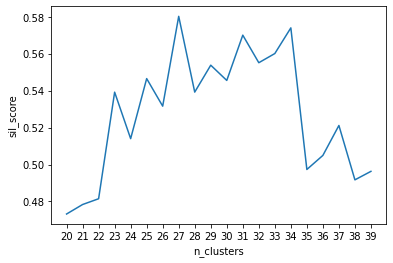

In [94]:
sns.lineplot(data=silhouette, x = 'n_clusters', y = 'sil_score')
text = n_clusters #silhouette[silhouette.sil_score == silhouette.sil_score.max()]['n_clusters']
plt.annotate(text = f'{text}', xy = (n_clusters, best_n_clusters), xytext = (30,0.4))
plt.xticks(range);

print(best_n_clusters)

## Agglomerative Clustering

In [35]:
sil_score_max = -1 #this is the minimum possible score

silhouette = pd.DataFrame(columns = ['n_clusters', 'sil_score'])

range = np.arange(20,40,1)

for n_clusters in range:
  model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
  labels = model.fit_predict(XTrain)
  sil_score = silhouette_score(XTrain, labels)
  # print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))

  silhouette = pd.concat([silhouette, pd.DataFrame(data=[[n_clusters, sil_score]], columns=['n_clusters', 'sil_score'])], axis = 0)
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

silhouette.reset_index(inplace=True, drop=True)

23


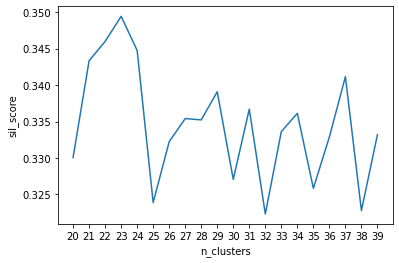

In [37]:
sns.lineplot(data=silhouette, x = 'n_clusters', y = 'sil_score')
text = n_clusters #silhouette[silhouette.sil_score == silhouette.sil_score.max()]['n_clusters']
plt.annotate(text = f'{text}', xy = (n_clusters, best_n_clusters), xytext = (30,0.4))
plt.xticks(range);

print(best_n_clusters)

## GridSearchCV

In [168]:
silhouette_db = pd.DataFrame(columns= ('min_samp', 'sil_score'))
x = 1
for eps in np.arange(3, 10, 1):
    for min_samp in np.arange(7,8,1):
        
        model = DBSCAN(eps= eps, min_samples = 7).fit_predict(XTrain)
        nunique = pd.Series(model).nunique()
        silhouette_db.loc[x, 'nunique'] = nunique
        silhouette_db.loc[x, 'min_samp'] = min_samp
        silhouette_db.loc[x, 'eps'] = eps
        silhouette_db.loc[x, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

        x += 1

display(silhouette_db.sort_values(by = 'sil_score', ascending = False))

,min_samp,sil_score,nunique,eps
7,7,0.682266,8.0,9.0
6,7,0.680071,8.0,8.0
5,7,0.679151,8.0,7.0
3,7,0.678694,8.0,5.0
4,7,0.678694,8.0,6.0
2,7,0.585383,9.0,4.0
1,7,0.578493,11.0,3.0


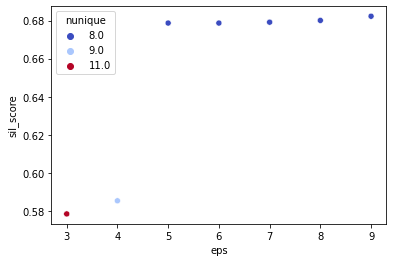

In [169]:
sns.scatterplot(data = silhouette_db, x = 'eps', y = 'sil_score', hue = 'nunique', palette= 'coolwarm');


# GaussianMixture

In [87]:
from sklearn.mixture import GaussianMixture

In [158]:
n_components = np.arange(10,40,1)
cov_type = ['tied']
# 'spherical', 'full', 'diag', 'tied'


GM_metrics = pd.DataFrame()

for i in n_components:
    for c in cov_type:
        gm_model = GaussianMixture(n_components = i, covariance_type = c)
        pred = pd.Series( gm_model.fit_predict(XTrain))
        GM_metrics = pd.concat([
            GM_metrics, 
            pd.DataFrame([[i, 
            silhouette_score(XTrain, pred, random_state = 0),
            c]])], 
            axis = 0)

GM_metrics.reset_index(inplace = True, drop = True)

,0,1,2
6,16,0.343135,tied
9,19,0.341998,tied
8,18,0.337509,tied
7,17,0.334580,tied
5,15,0.332622,tied
4,14,0.331555,tied
14,24,0.323678,tied
10,20,0.323451,tied
3,13,0.321214,tied
21,31,0.321149,tied


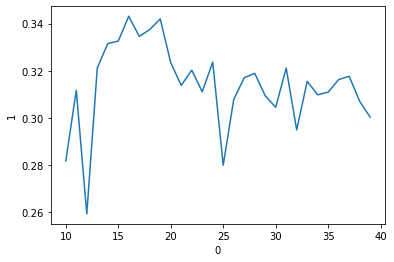

In [159]:
# yTrain.loc[:,'GM'] =  gm_model.fit_predict(XTrain)
# silhouette_score(XTrain, yTrain['GM'], random_state = 0)

display(GM_metrics.sort_values(by = 1, ascending= False).head(20))

sns.lineplot(data = GM_metrics,
                x = 0,
                y = 1,
                # hue = 2
                );

# MeanShift

In [181]:
MS  = MeanShift(bandwidth=2,
                seeds=None,
                bin_seeding=False,
                min_bin_freq=100,
                cluster_all=True,
                n_jobs=-1,
                max_iter=300)

cluster_results = MS.fit_predict(XTrain)


In [182]:
beep()
# press esc

149


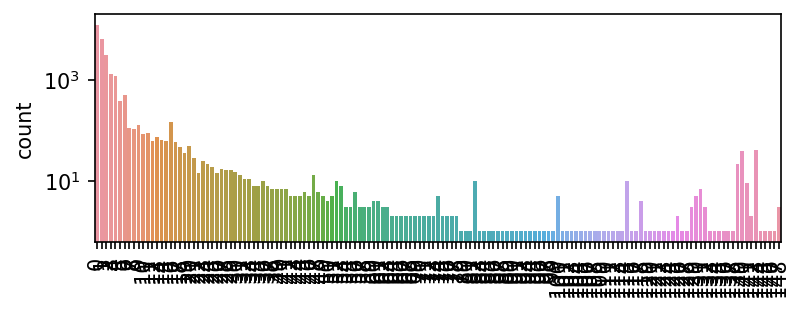

In [183]:
print(np.unique(cluster_results)[-1]+1)

plt.figure(dpi = 150, figsize=(15*cm, 5*cm))
sns.countplot(x = cluster_results,
            # hue = yTrain
            )
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [119]:
cluster_results = KMeans(38, random_state=42).fit_predict(XTrain)

c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# CHECKING CLUSTERIZATION

In [184]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns = None
pd.crosstab(yTrain,  cluster_results).style.background_gradient(cmap= 'coolwarm')

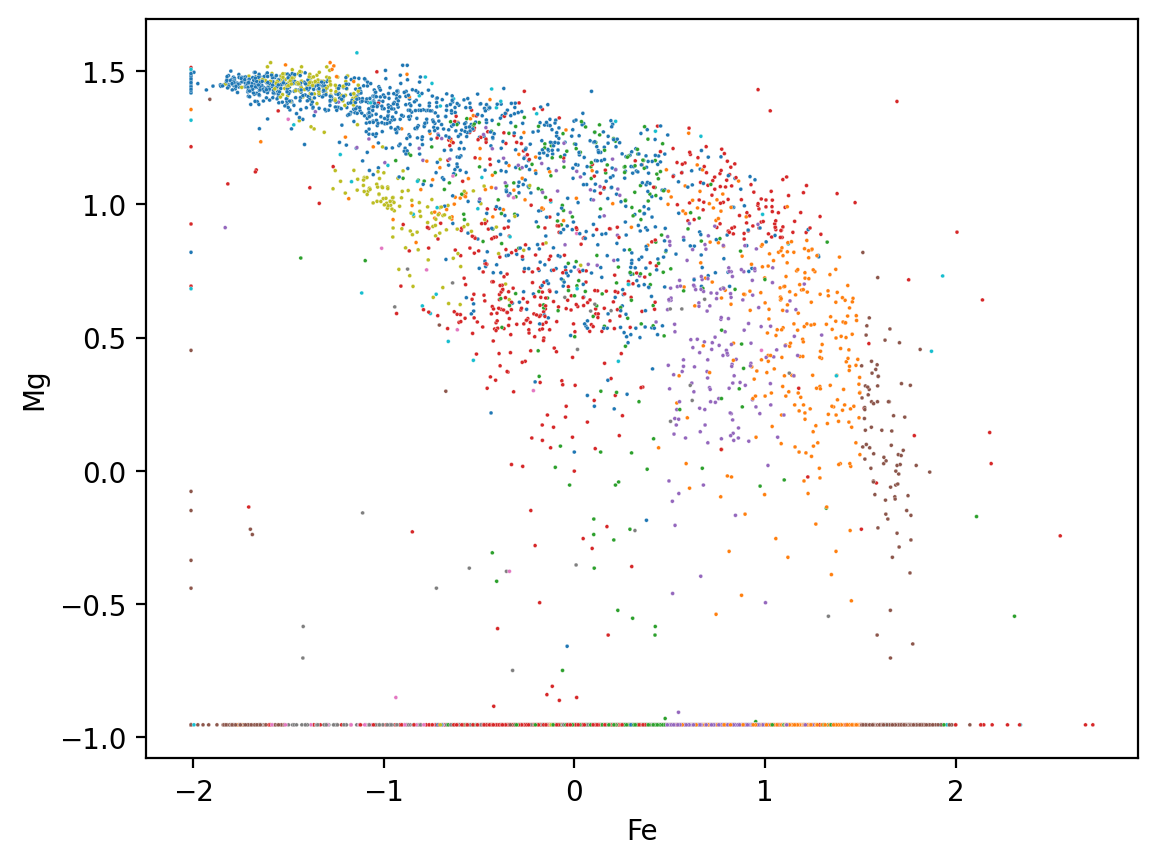

In [99]:
plt.figure(dpi=200)
sns.scatterplot(data = XTrain,
            x = 'Fe',
            y = 'Mg',
            s = 2,
            hue = yTrain,
            palette='tab10')
plt.legend().set_visible(False)